# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from dqn_agent import DQNAgent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
!ls Banana_Linux

Banana_Data  Banana.x86  Banana.x86_64


In [3]:
import platform
import os
# TODO populate the other platform keys 
unity_env_file_name = {'Linux-x86_64': os.path.join('Banana_Linux', 'Banana.x86_64')}['{}-{}'.format(platform.system(), platform.machine())]

In [4]:
env = UnityEnvironment(file_name=unity_env_file_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 4.DQN Exploration

The task is episodic, and in order to solve the environment, the agent must get an average score of +13 over 100 consecutive episodes.

In [7]:
# plot the scores
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [8]:
agent_1 = DQNAgent(state_size=state_size, action_size=action_size, seed=0,  batch_size=64, step_to_update= 5,
                   buffer_size=int(1e5), gamma=.99, lr=5e-4, tau=1e-3, episodes_window_size=100)
agent_1.explore(env)

Episode 100	Average Score: 0.96
Episode 200	Average Score: 5.13
Episode 300	Average Score: 9.52
Episode 400	Average Score: 11.99
Episode 434	Average Score: 13.02
Environment solved in 434 episodes!	Average Score: 13.02


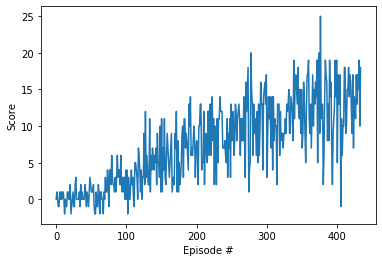

In [9]:
plot_scores(agent_1.scores)

In [10]:
agent_2 = DQNAgent(state_size=state_size, action_size=action_size, seed=0, buffer_size=10000,batch_size=128)
agent_2.explore(env, brain_name=brain_name)

Episode 100	Average Score: 1.95
Episode 200	Average Score: 6.24
Episode 300	Average Score: 9.17
Episode 400	Average Score: 11.62
Episode 448	Average Score: 13.08
Environment solved in 448 episodes!	Average Score: 13.08


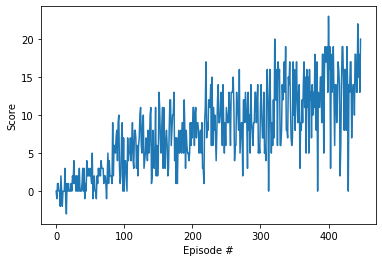

In [11]:
plot_scores(agent_2.scores)

When finished, you can close the environment.

In [12]:
env.close()